In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(df.shape)
print(df.info())
df.describe()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Exploration
Now we can plot the distribution of data wrt dependent variable i.e HeartDisease

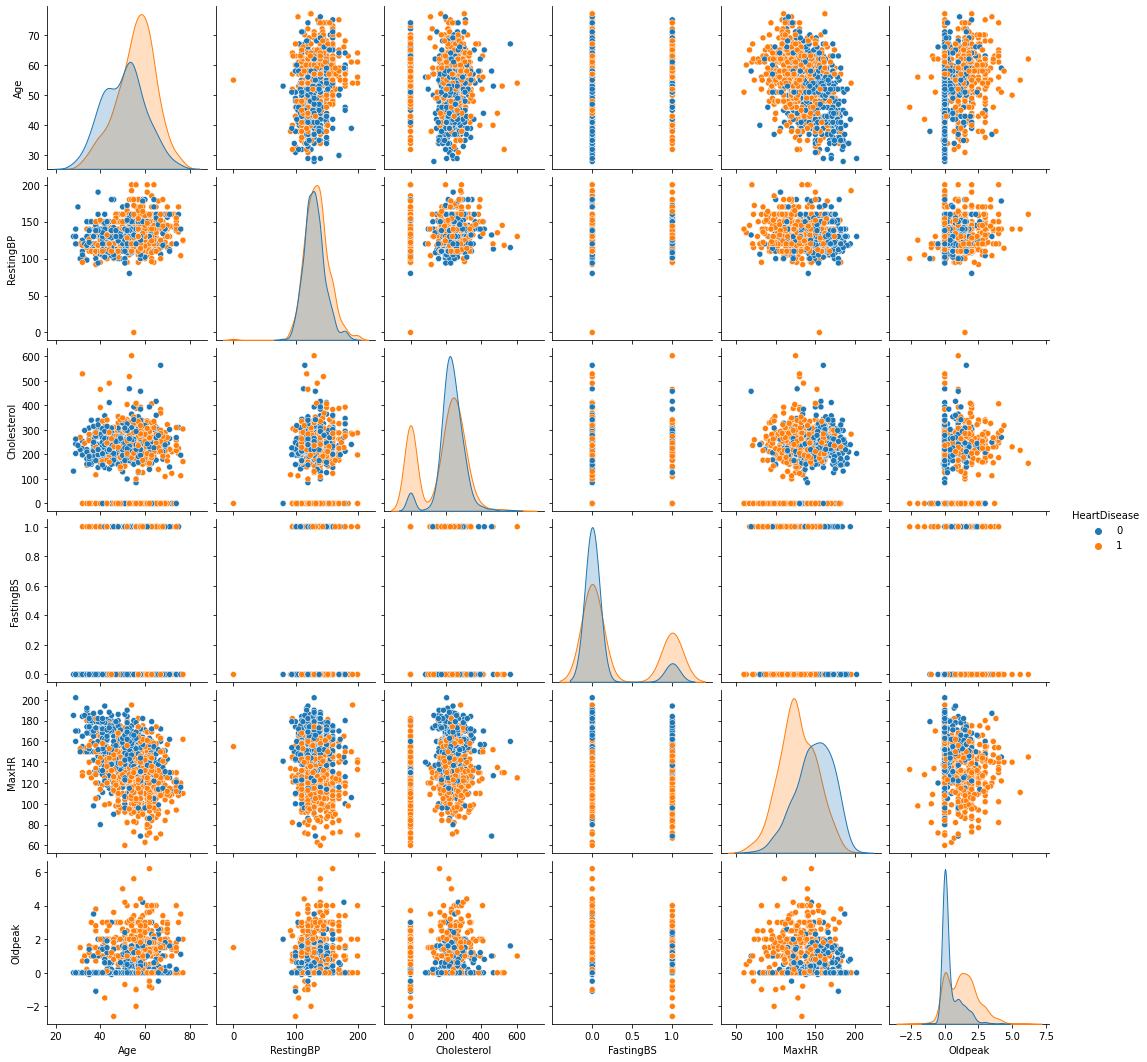

In [7]:
sns.pairplot(df,hue='HeartDisease')

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


Text(0.5, 1.0, 'Age Distribution')

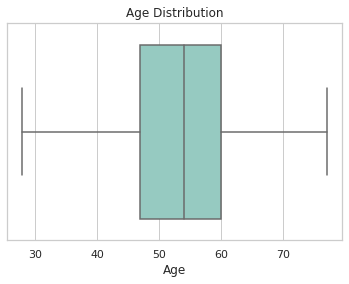

In [9]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Age", data=df, palette="Set3")
plt.title("Age Distribution")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb4ba19510>,
      dtype=object)

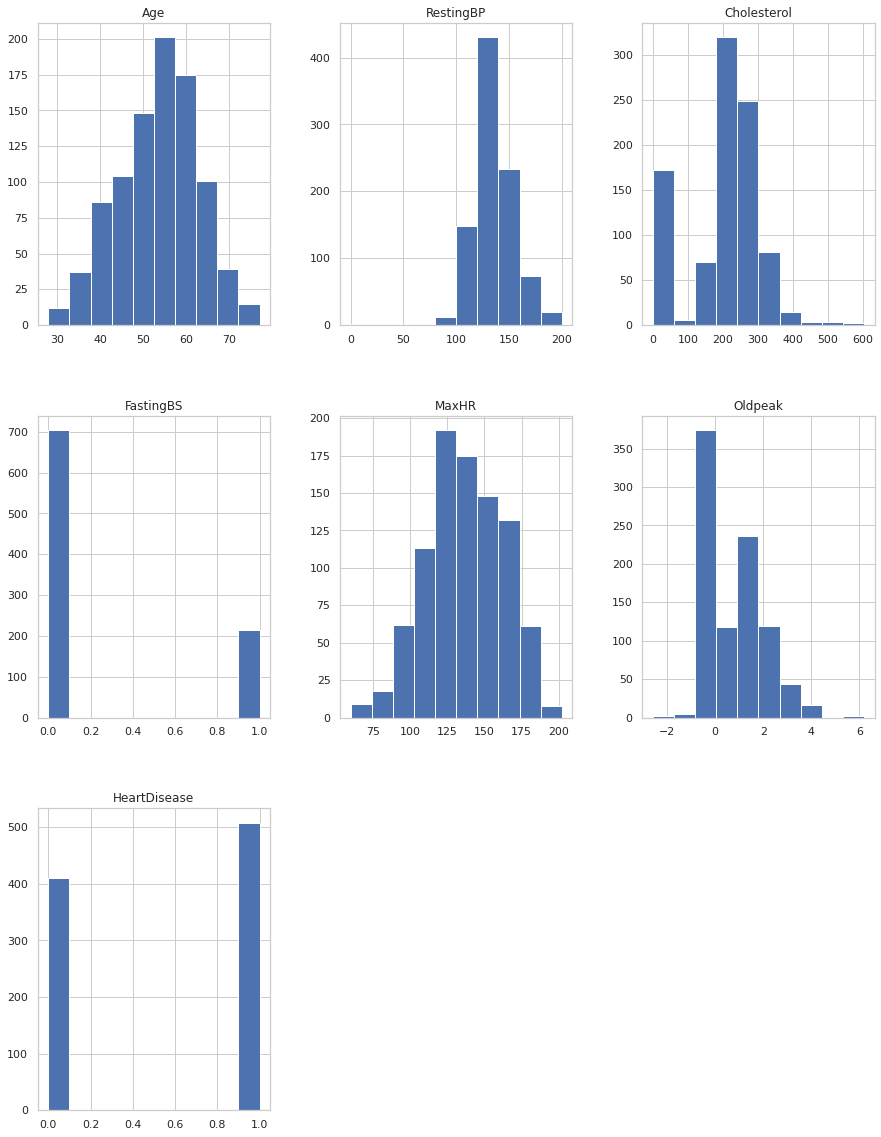

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

Text(0.5, 1.0, 'Heart Diseases')

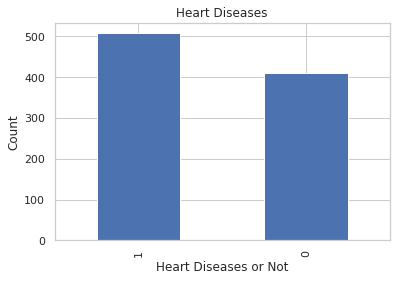

In [11]:
df.HeartDisease.value_counts().plot(kind='bar')
plt.xlabel("Heart Diseases or Not")
plt.ylabel("Count")
plt.title("Heart Diseases")

## Data Preprocessing

In [12]:
cat = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [13]:
df[cat]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [14]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat] = df[cat].apply(lb.fit_transform)

In [15]:
df[cat]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2
...,...,...,...,...,...
913,1,3,1,0,1
914,1,0,1,0,1
915,1,0,1,1,1
916,0,1,0,0,1


In [16]:
X=df.drop('HeartDisease',axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [17]:
y=df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [19]:
X_train.shape

(734, 11)

In [20]:
from sklearn.preprocessing import QuantileTransformer
scaler=QuantileTransformer()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# Transform features using quantiles information.

# This method transforms the features to follow a uniform or a normal distribution. 
# Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
# It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

# The transformation is applied on each feature independently. First an estimate of the cumulative distribution 
# function of a feature is used to map the original values to a uniform distribution. The obtained values are then 
# mapped to the desired output distribution using the associated quantile function. Features values of new/unseen 
# data that fall below or above the fitted range will be mapped to the bounds of the output distribution. 
# Note that this transform is non-linear. It may distort linear correlations between variables measured at the 
# same scale but renders variables measured at different scales more directly comparable

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (734). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [22]:
X_train[0]

array([0.96998636, 1.        , 0.        , 0.7005457 , 0.        ,
       1.        , 0.49931787, 0.75443383, 1.        , 0.85129604,
       0.31855389])

# Using KNN
K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

In [23]:
from sklearn.neighbors import KNeighborsClassifier


In [50]:
knn=KNeighborsClassifier(n_neighbors=4,metric='euclidean',p=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4, p=1)

In [51]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1])

In [52]:
knn.score(X_test,y_test)

0.8478260869565217

In [53]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [43]:
metrics.accuracy_score(y_test,y_pred)

0.8695652173913043

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[66, 11],
       [13, 94]])

In [45]:
from sklearn.metrics import classification_report
target_names = ['Heart Diseases', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

Heart Diseases       0.84      0.86      0.85        77
        Normal       0.90      0.88      0.89       107

      accuracy                           0.87       184
     macro avg       0.87      0.87      0.87       184
  weighted avg       0.87      0.87      0.87       184



To select optimize k value we will use elbow method

In [46]:
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

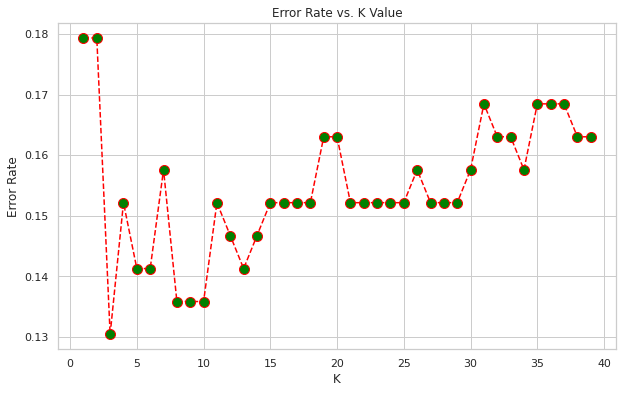

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
#From graph we can see that optimize k value is 16,17,18
# Now we will train our KNN classifier with this k values

knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [49]:
knn.score(X_test,y_test)

0.8695652173913043

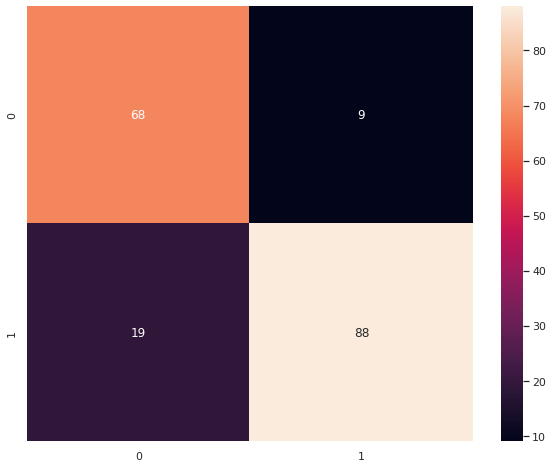

In [54]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [55]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.78      0.88      0.83        77
      Normal       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Using H2o.ai AutoML

In [56]:
!pip install h2o

     |████████████████████████████████| 175.8 MB 30 kB/s 
  Created wheel for h2o: filename=h2o-3.34.0.7-py2.py3-none-any.whl size=175908084 sha256=e6a3571685a1dc2c8bd25b886c2a4d5fed19e00e171dd472f697207f6892a67c
  Stored in directory: /root/.cache/pip/wheels/df/df/05/1f2ac68a5d9bf38b74f2b8218443b2c00f1a5f4f3154ec11b6
Successfully built h2o


In [57]:
import h2o
# We will be using default parameter Here with H2O init method
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpuoeseiku
  JVM stdout: /tmp/tmpuoeseiku/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpuoeseiku/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_5l785c
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Covert to H2O Data frame

In [58]:
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
# Data Transform - Split train : test datasets
train, valid = hf.split_frame(ratios = [.80], seed = 1234)
print("Training Dataset", train.shape)
print("Validation Dataset", valid.shape)

Training Dataset (737, 12)
Validation Dataset (181, 12)


In [60]:
train.head(5)

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,1,1,140,289,0,1,172,0,0,2,0
49,0,2,160,180,0,1,156,0,1,1,1
37,1,1,130,283,0,2,98,0,0,2,0
54,1,2,150,195,0,1,122,0,0,2,0
39,1,2,120,339,0,1,170,0,0,2,0


In [61]:
valid.head()


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
48,0,0,138,214,0,1,108,1,1.5,1,1
48,0,1,120,284,0,1,120,0,0,2,0
42,0,2,115,211,0,2,137,0,0,2,0
43,0,1,120,201,0,1,165,0,0,2,0
60,1,0,100,248,0,1,125,0,1,1,1
36,1,1,120,267,0,1,160,0,3,1,1
43,0,3,100,223,0,1,142,0,0,2,0
44,1,1,120,184,0,1,142,0,1,1,0
53,1,0,124,260,0,2,112,1,3,1,0
51,1,1,125,188,0,1,145,0,0,2,0


In [62]:
# Identify predictors and response
featureColumns = train.columns
targetColumn   = "HeartDisease"
featureColumns.remove(targetColumn)

In [63]:
import time
from h2o.automl import H2OAutoML

        
# Run AutoML for YY base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=12, seed=1234,
                balance_classes = True
               )
aml.train(x=featureColumns, y=targetColumn, training_frame = train, validation_frame = valid)

AutoML progress: |
23:04:52.550: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
23:04:52.646: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
23:04:55.693: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
23:04:57.700: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_1_20220115_230452,0.10012,0.316418,0.10012,0.21575,0.221798
StackedEnsemble_AllModels_3_AutoML_1_20220115_230452,0.100468,0.316967,0.100468,0.215694,0.22216
GBM_2_AutoML_1_20220115_230452,0.100551,0.317098,0.100551,0.220584,0.222492
StackedEnsemble_BestOfFamily_3_AutoML_1_20220115_230452,0.100644,0.317245,0.100644,0.21626,0.222201
StackedEnsemble_AllModels_6_AutoML_1_20220115_230452,0.100778,0.317455,0.100778,0.219386,0.222679
StackedEnsemble_BestOfFamily_2_AutoML_1_20220115_230452,0.100933,0.3177,0.100933,0.217035,0.222553
StackedEnsemble_AllModels_1_AutoML_1_20220115_230452,0.100985,0.317781,0.100985,0.218224,0.222681
StackedEnsemble_BestOfFamily_7_AutoML_1_20220115_230452,0.101217,0.318146,0.101217,0.21801,0.223049
GBM_3_AutoML_1_20220115_230452,0.101352,0.318358,0.101352,0.220147,0.223621
StackedEnsemble_BestOfFamily_4_AutoML_1_20220115_230452,0.101662,0.318845,0.101662,0.219292,0.223471


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_2_AutoML_1_20220115_230452,0.10012,0.316418,0.10012,0.21575,0.221798,1441,0.128966,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220115_230452,0.100468,0.316967,0.100468,0.215694,0.22216,1718,0.136355,StackedEnsemble
GBM_2_AutoML_1_20220115_230452,0.100551,0.317098,0.100551,0.220584,0.222492,199,0.0131,GBM
StackedEnsemble_BestOfFamily_3_AutoML_1_20220115_230452,0.100644,0.317245,0.100644,0.21626,0.222201,1285,0.035965,StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_1_20220115_230452,0.100778,0.317455,0.100778,0.219386,0.222679,1208,0.104934,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20220115_230452,0.100933,0.3177,0.100933,0.217035,0.222553,1486,0.03397,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20220115_230452,0.100985,0.317781,0.100985,0.218224,0.222681,1327,0.071202,StackedEnsemble
StackedEnsemble_BestOfFamily_7_AutoML_1_20220115_230452,0.101217,0.318146,0.101217,0.21801,0.223049,945,0.047672,StackedEnsemble
GBM_3_AutoML_1_20220115_230452,0.101352,0.318358,0.101352,0.220147,0.223621,179,0.014972,GBM
StackedEnsemble_BestOfFamily_4_AutoML_1_20220115_230452,0.101662,0.318845,0.101662,0.219292,0.223471,1196,0.04887,StackedEnsemble


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

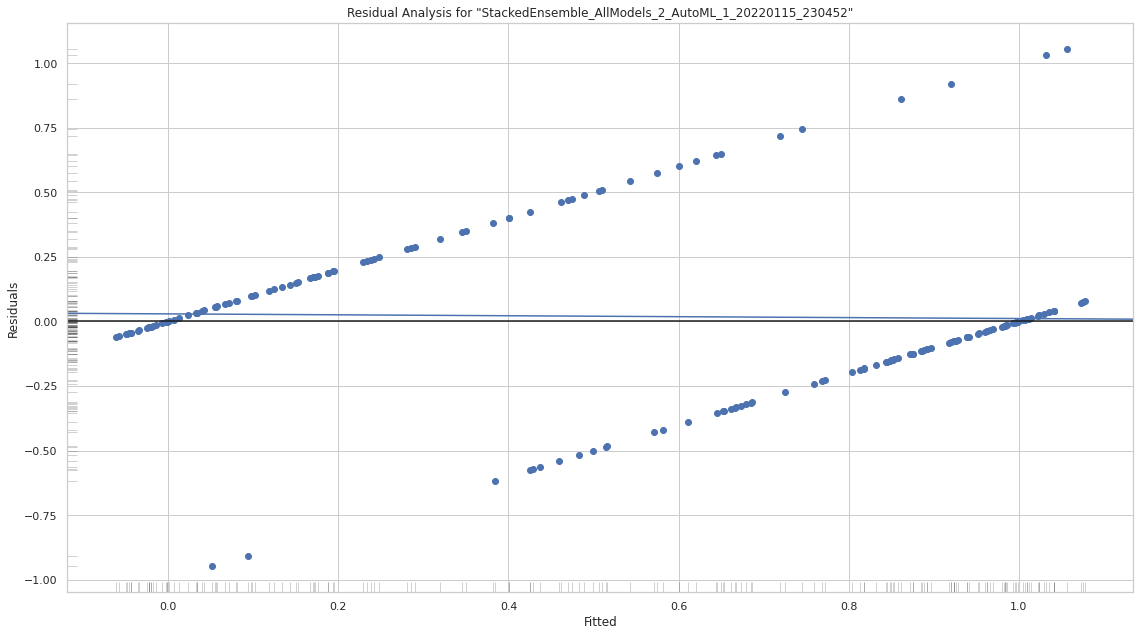

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

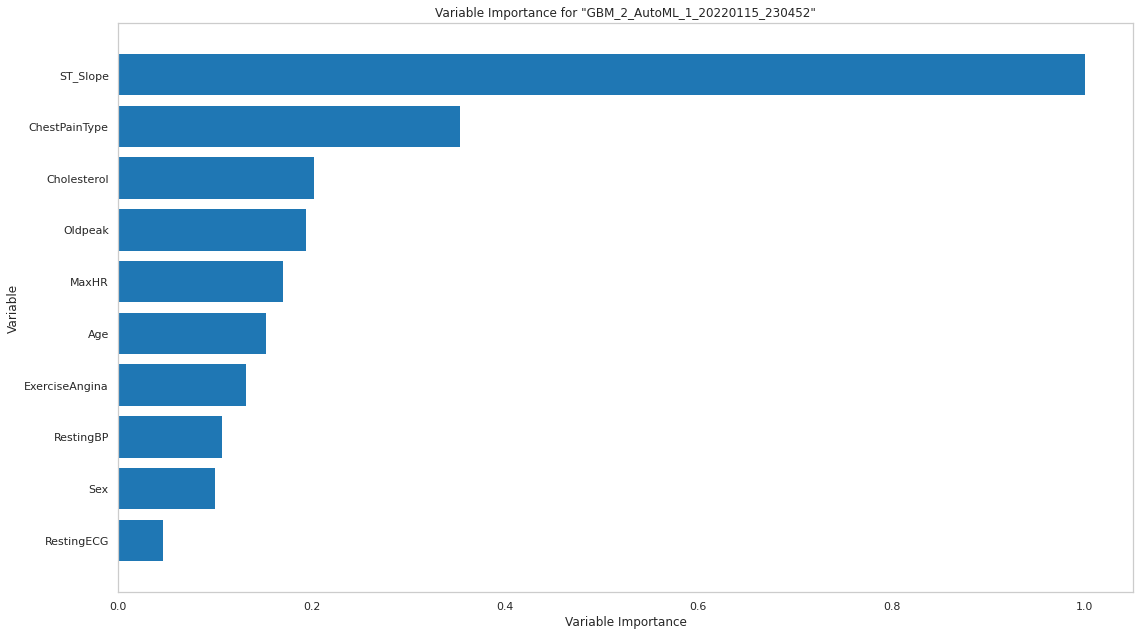

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

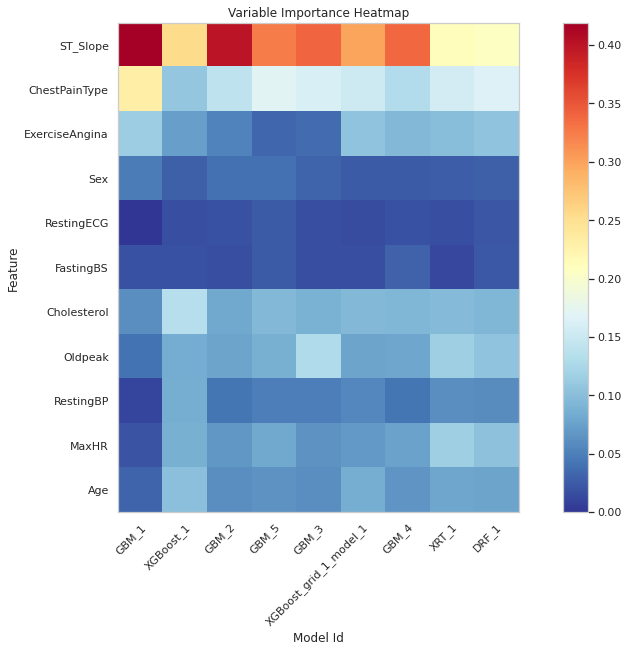

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

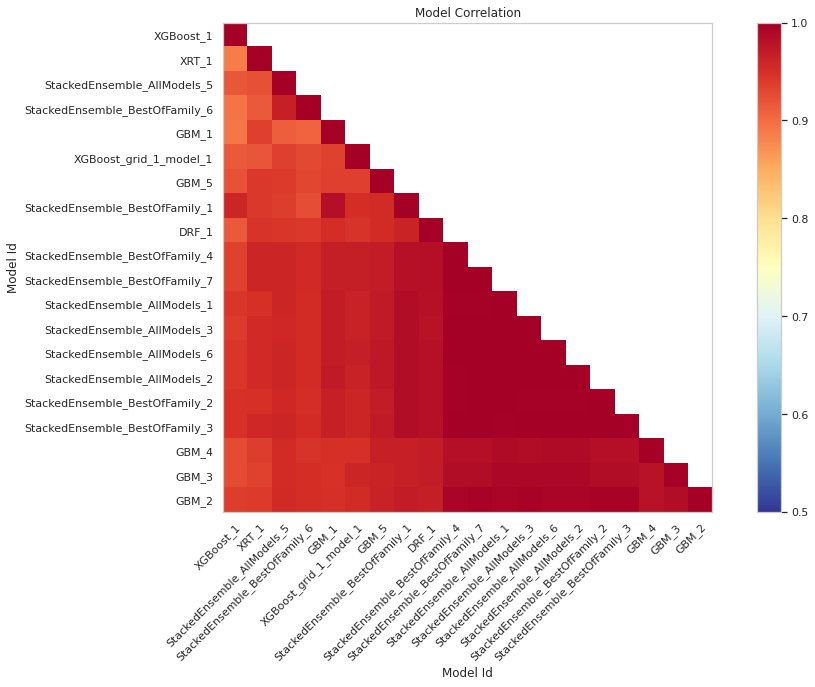

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

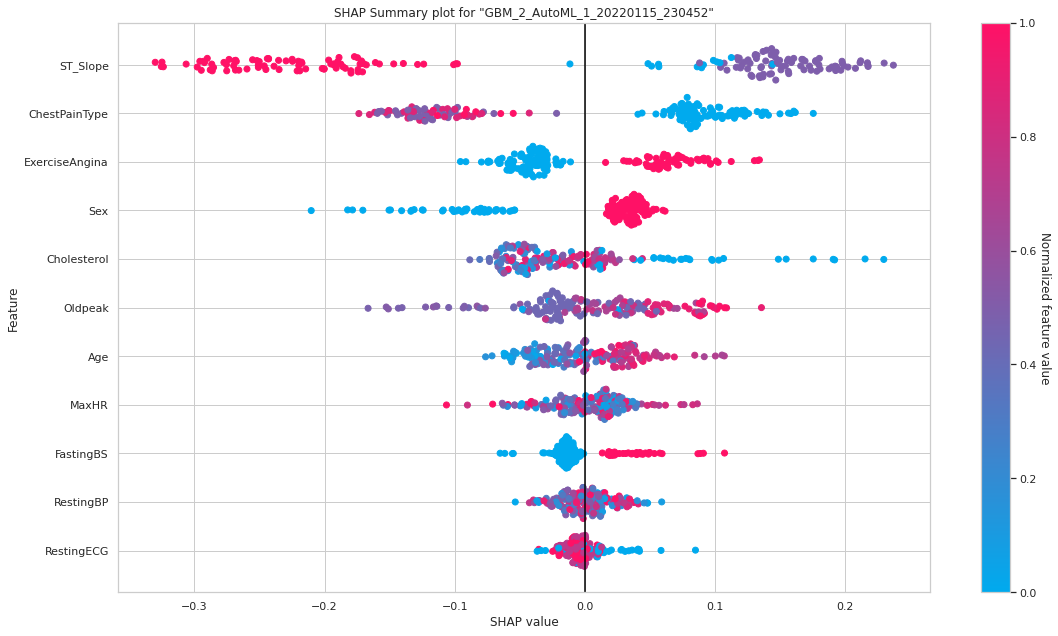

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

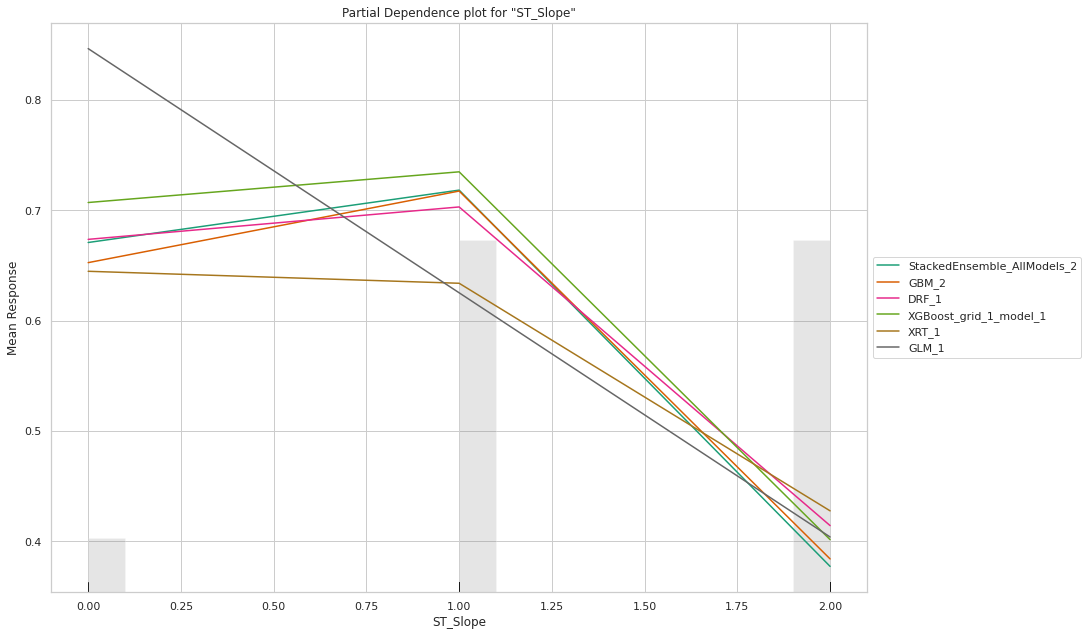

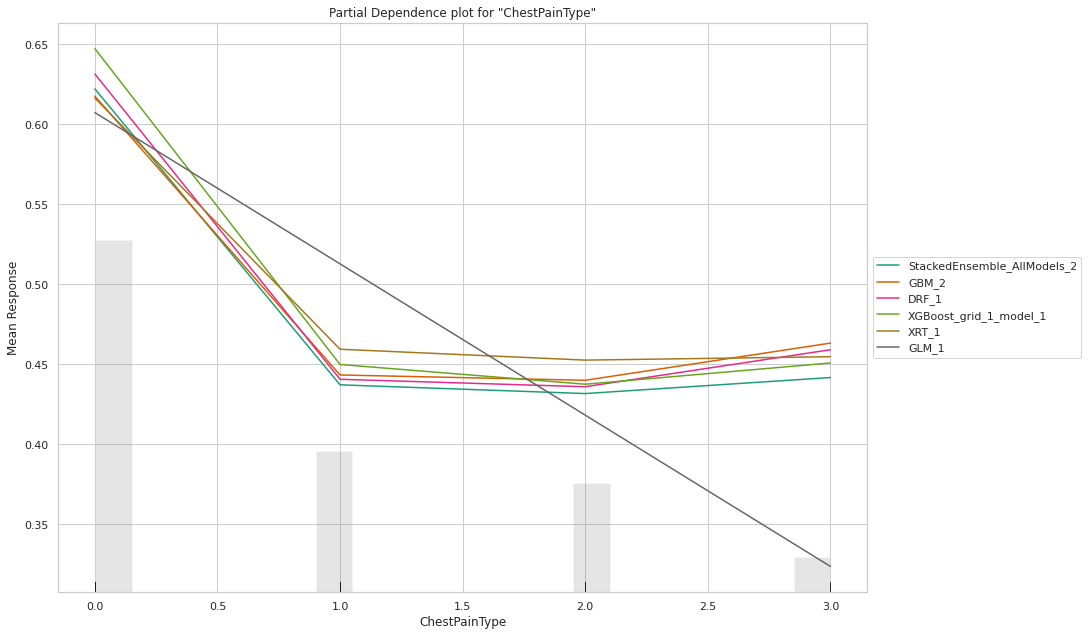

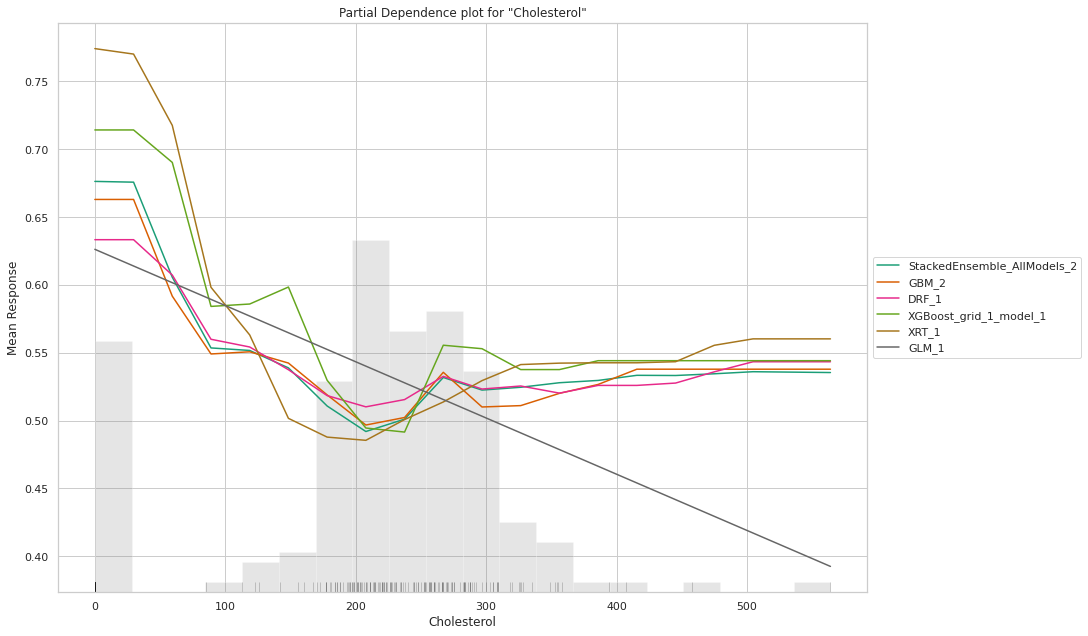

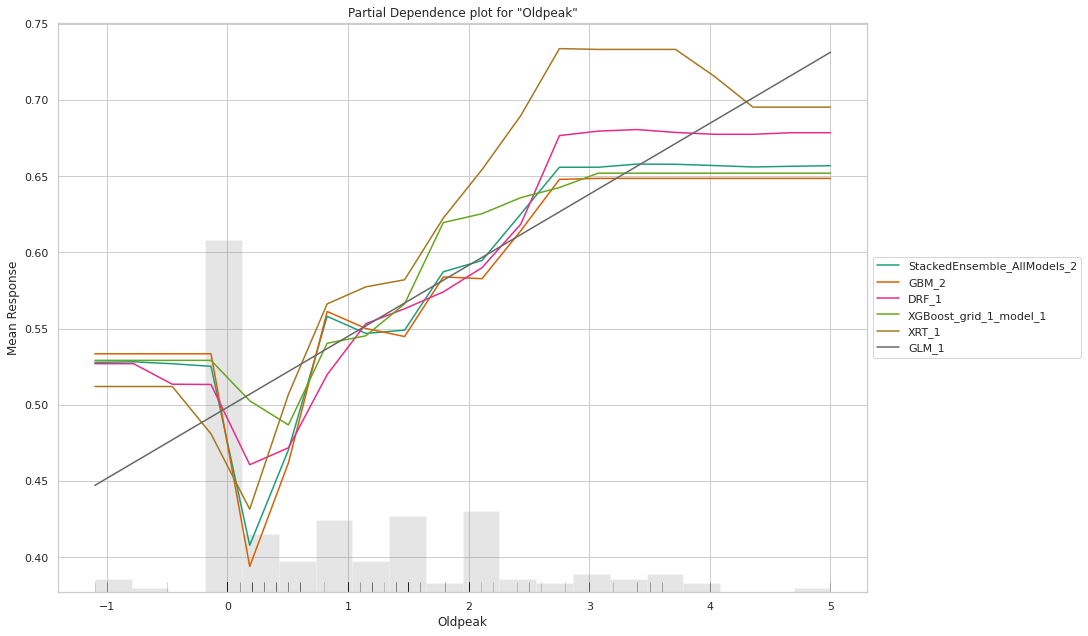

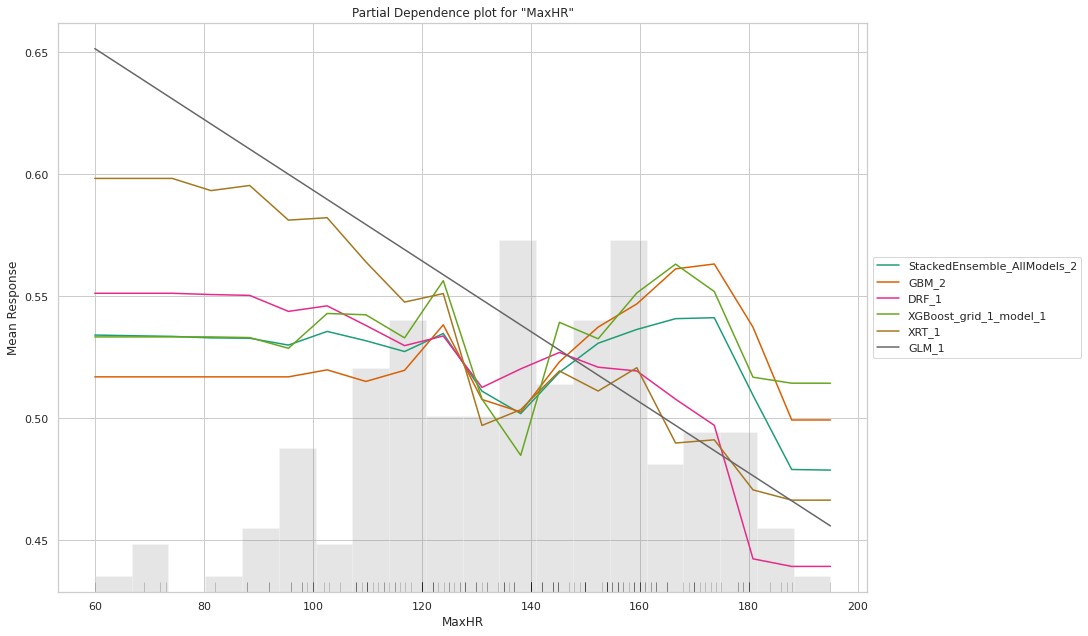

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

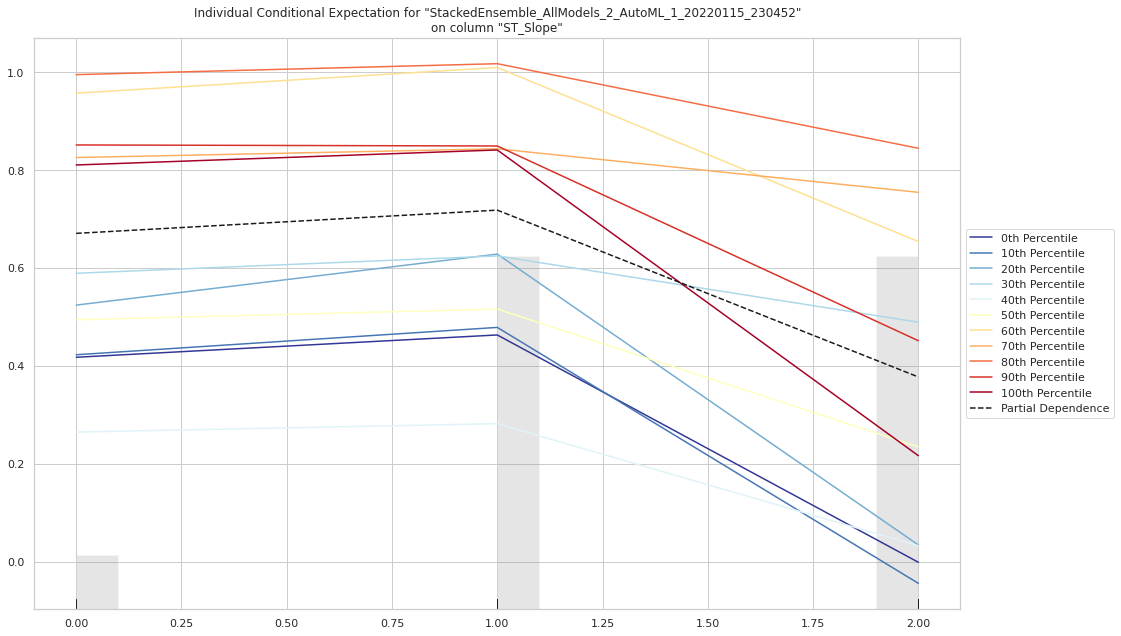

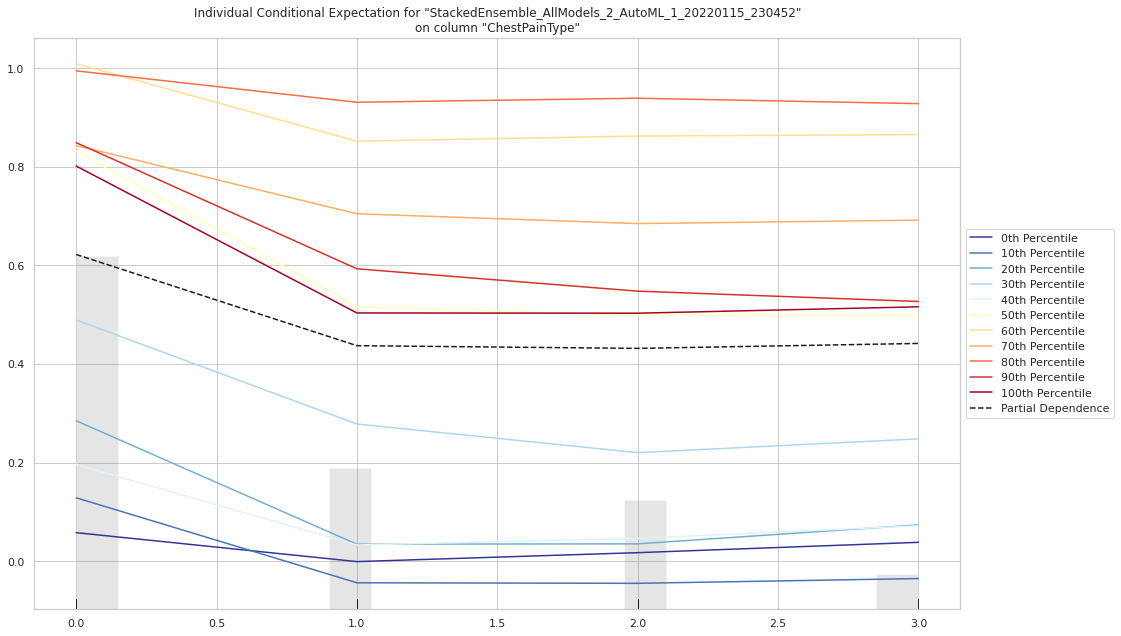

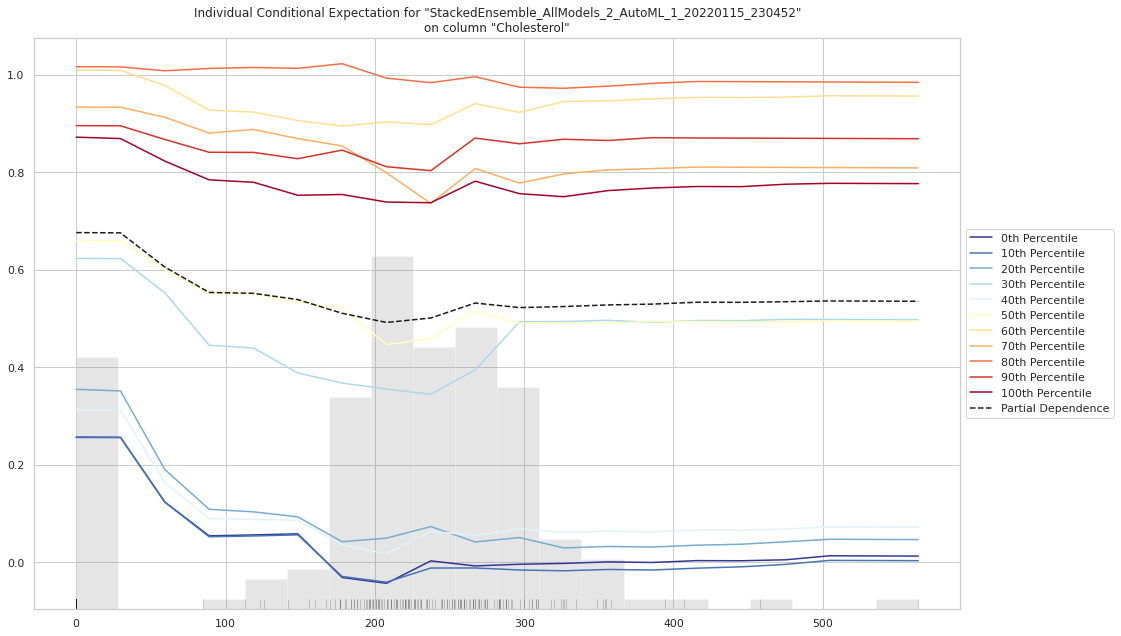

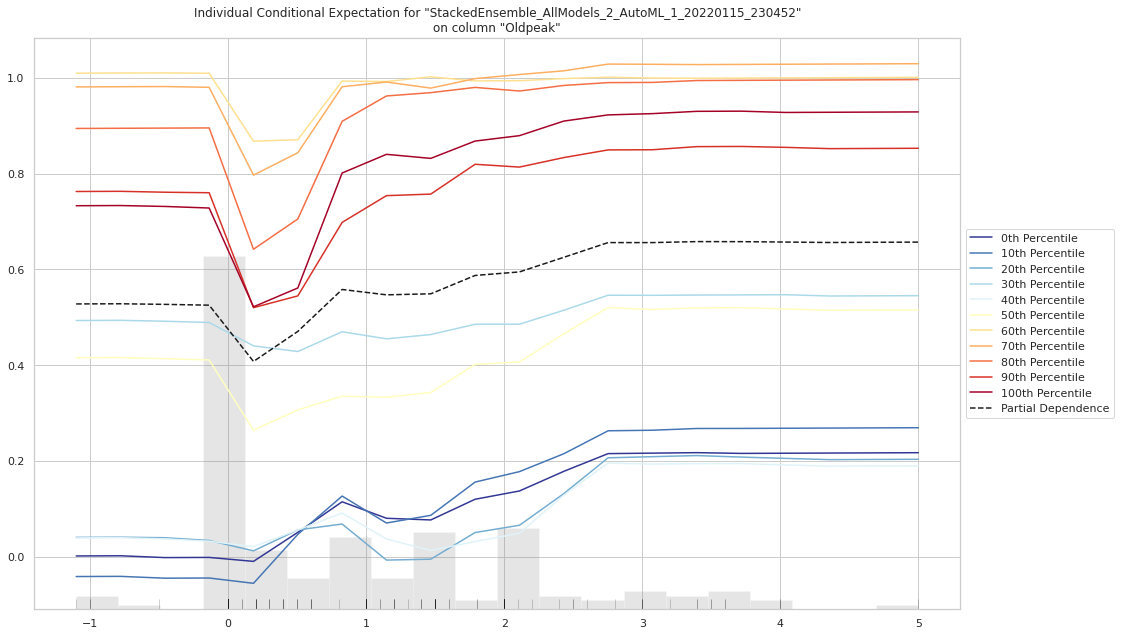

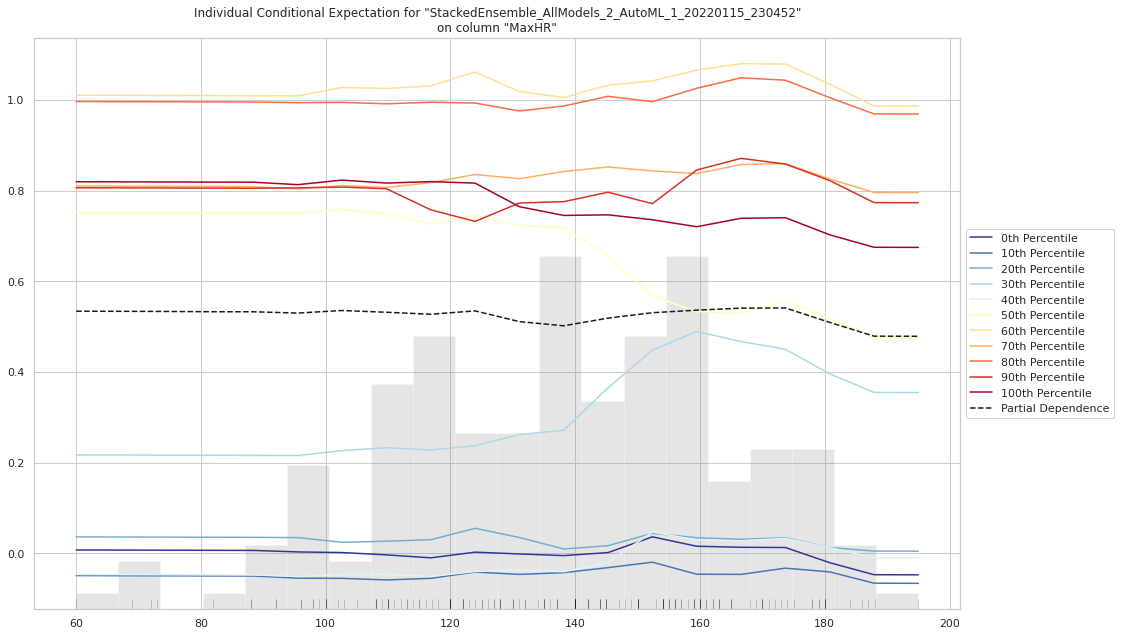

In [64]:
lb = aml.leaderboard
print(lb.head(rows = lb.nrows))

# Explain an AutoML object i.e. explain all models
exa = aml.explain(valid)

In [65]:
# Evaluate the best model with testing data.
model = aml.leader

In [67]:
!pip install scikit-plot

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%

Testing Results of the trained model: 

Accuracy :  0.8729281767955801

Confusion Matrix :
 [[74 14]
 [ 9 84]]

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.84      0.87        88
           1       0.86      0.90      0.88        93

    accuracy                           0.87       181
   macro avg       0.87      0.87      0.87       181
weighted avg       0.87      0.87      0.87       181



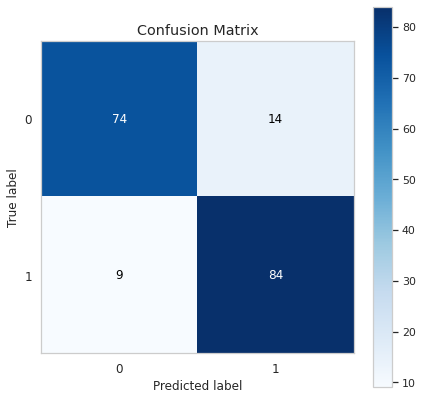

In [68]:
# For Classification
import scikitplot as skplt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix

# Predict with the best model.
predicted_y = model.predict(valid[featureColumns])

predicted_data = predicted_y.as_data_frame()
valid_dataset = valid.as_data_frame()

# Evaluate the skill of the Trained model
acc                 = accuracy_score(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
classReport         = classification_report(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])))
confMatrix          = confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict']))) 
        
print(); print('Testing Results of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)

# Confusion matrix
skplt.metrics.plot_confusion_matrix(valid_dataset[targetColumn], np.round(abs(predicted_data['predict'])), figsize=(7,7)); plt.show()